## Projet GraphAlgo (FR)
Ce projet est un projet personnel, il me sert d'exercice : c'est pour ça que les explications sont donc en français.

**Objectif(s)** :
L'objectif principal est de créer un algorithme capable de générer un graphique boursier de manière procédurale.
***


### Initialisation

In [1]:
#import des librairies nécessaires
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline

### Exemple d'utilisation

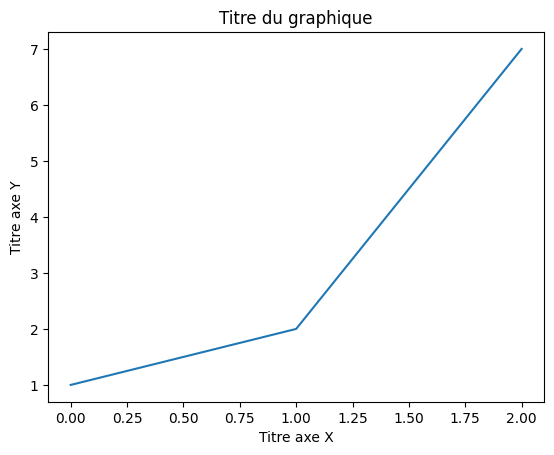

In [2]:
#exemple de base d'utilisation de matplotlib dans jupyter notebook
x = range(3)
y = [1, 2, 7]

plt.plot(x, y) #création du graphique
plt.title("Titre du graphique")
plt.xlabel("Titre axe X")
plt.ylabel("Titre axe Y")

plt.show() #affichage du graphique

### Début du projet - déclaration des variables
On va essayer de générer des valeurs pour construire un graphique boursier sur une année. 
Les valeurs seront stockées par groupe (mois, jours), pour une année il nous faut donc 12 valeurs de mois (début du mois - jour 1 du mois en question) et 365 valeurs de jours sachant que les 12 valeurs de mois constituent déjà les valeurs des premiers jours de chaque mois.

Dans cet exercice je vais utiliser la base d'un calendrier grégorien.

In [3]:
annee_classique = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
annee_bissextile = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

In [4]:
valeurs = [] #liste qui va stocker nos valeurs (points sur l'axe X à placer)
annees = [] #liste qui va stocker les différentes années
historique = {} #dictionnaire jour-valeur

In [5]:
valeur_depart = 100 #valeur par défaut
f_reussite = 1 #facteur chance réussite
f_faillite = 1 #facteur chance faillite
taux = 0.05 #5% en moyenne
probaNormale = 0.50 #50%

### Déclaration des fonctions

In [6]:
def njAnnee(annee):
    """
    Retourne 366 si l'année est bissextile 
    Retourne 365 l'année est classique

    Règles :
    - une année est bissextile si elle est divisible par 4.
    - si elle est divisible par 100 elle n'est pas bissextile sauf si elle est divisible par 400.
    """
    if annee % 400 == 0:
        return 366
    elif annee % 100 == 0:
        return 365
    elif annee % 4 == 0:
        return 366
    else:
        return 365

In [7]:
def logiqueAnnee(debut, fin):
    """
    Logique de calcul pour les différentes variables en lien avec les années, etc...
    """
    annees = [annee for annee in range(debut,fin)] #l'année de fin n'est pas incluse
    n_annees = len(annees)
    n_mois = n_annees * 12
    jours_ans = [njAnnee(annee) for annee in annees]
    n_jours = sum(jours_ans)
    return annees, n_annees, n_mois, jours_ans, n_jours

In [8]:
def calcHisto(valeur_depart, ancienne_valeur, historique):
    """
    Renvoie un indice (sur 100) de l'état de la valeur de l'action dans le temps (temps donné t) grâce à l'historique

    50 : état normal
    100 : état amélioré
    0 : état diminué 
    """
    etat = 50
    
    if len(historique) < 10:
        moyenne_totale = sum(historique.values()) / len(historique)
        moyenne_dix = (ancienne_valeur + valeur_depart)/2
    else :
        dix_dernieres_valeurs = list(historique.values())[-10:]
        
        moyenne_totale = sum(historique.values()) / len(historique)
        moyenne_dix = sum(dix_dernieres_valeurs) / len(dix_dernieres_valeurs)

    #conditions
    if moyenne_totale >= valeur_depart:
        etat += 15
    else:
        etat -= 15

    if moyenne_dix >= valeur_depart:
        etat += 25
    else:
        etat -= 25

    if ancienne_valeur >= valeur_depart:
        etat += 10
    else:
        etat -= 10

    return etat

In [9]:
def calcEtat(valeur_depart, ancienne_valeur, historique, probaNormale):
    """
    Permet de calculer la probabilité de hausse ou de baisse pour la prochaine valeur
    """
    seuil = 1 - probaNormale
    etat = calcHisto(valeur_depart, ancienne_valeur, historique)
    #print(f"l'état est de : {etat}")
    
    ajustement = 0
    if etat < 50:
        if etat == 30:
            ajustement = 0.005
        elif etat == 20:
            ajustement = 0.01
        else:
            ajustement = 0.10
    elif etat > 50:
        if etat == 70:
            ajustement = -0.005
        elif etat == 80:
            ajustement = -0.01
        else:
            ajustement = -0.10
    
    proba_baisse = round( ((1 - probaNormale) / 2) + (ajustement * seuil), 3)
    proba_hausse = round( ((1 - probaNormale) / 2) - (ajustement * seuil), 3)

    return proba_baisse, proba_hausse

In [10]:
def tirage(probaNormale, proba_baisse, proba_hausse):
    """
    Permet de déterminer par le hasard si une hausse, une diminution 
    ou une distribution normale va s'appliquer
    """
    options = ["Baisse", "Normale", "Hausse"]
    probabilites = [proba_baisse, probaNormale, proba_hausse]

    selection = random.choices(options, weights=probabilites, k=1)[0]

    return selection

In [11]:
def baisse(ancienne_valeur):
    """
    dépend largement des conditions de marché et de l'entreprise
    probabilités à changer en fonction du type d'action...
    (à compléter)
    """
    probabilite_faillite = 0.001 
    probabilite_chute = 0.005
    probabilite_baisse = 1 - probabilite_faillite - probabilite_chute

    options = ["Faillite", "Baisse", "Chute"]
    probabilites = [probabilite_faillite, probabilite_baisse, probabilite_chute]

    selection = random.choices(options, weights=probabilites, k=1)[0]

    if selection == "Faillite":
        #pertes pour une faillite de 10% à 95% 
        pertes = [round(-x, 2) for x in np.linspace(10, 95, 85*10+1)]
        proba_pertes = [random.uniform(0.5, 1) for _ in pertes]
        proba_pertes = [p/sum(proba_pertes) for p in proba_pertes]
        
        perte_selectionnee = random.choices(pertes, weights=proba_pertes, k=1)[0]
    
    elif selection == "Chute":
        #pertes pour une chute de 5% à 10%
        pertes = [round(-x, 2) for x in np.linspace(5, 10, 50+1)]
        proba_pertes = [random.uniform(0.5, 1) for _ in pertes]
        proba_pertes = [p/sum(proba_pertes) for p in proba_pertes]
        
        perte_selectionnee = random.choices(pertes, weights=proba_pertes, k=1)[0]

    else: # == "Baisse":
        #pertes pour une baisse de 0.01% à 1%
        pertes = [round(-x, 2) for x in np.linspace(0.01, 1, 499+1)]
        proba_pertes = [random.uniform(0.5, 1) for _ in pertes]
        proba_pertes = [p/sum(proba_pertes) for p in proba_pertes]
        
        perte_selectionnee = random.choices(pertes, weights=proba_pertes, k=1)[0]
        
    nouvelle_valeur = ancienne_valeur * (1 + perte_selectionnee / 100.0)
    return nouvelle_valeur

In [12]:
def hausse(ancienne_valeur):
    """
    dépend largement des conditions de marché et de l'entreprise
    probabilités à changer en fonction du type d'action...
    (à compléter)
    """ 
    probabilite_hausse_significative = 0.001
    probabilite_hausse_moderee = 0.005
    probabilite_hausse_legere = 1 - probabilite_hausse_significative - probabilite_hausse_moderee

    options = ["Hausse légère", "Hausse modérée", "Hausse significative"]
    probabilites = [probabilite_hausse_legere, probabilite_hausse_moderee, probabilite_hausse_significative]

    selection = random.choices(options, weights=probabilites, k=1)[0]

    if selection == "Hausse légère":
        #hausse légère de 0.01% à 1%
        gains = [round(x, 2) for x in np.linspace(0.01, 1, 499+1)]
        proba_gains = [random.uniform(0.5, 1) for _ in gains]
        proba_gains = [p/sum(proba_gains) for p in proba_gains]

        gain_selectionne = random.choices(gains, weights=proba_gains, k=1)[0]

    elif selection == "Hausse modérée":
        #hausse modérée de 1% à 10%
        gains = [round(x, 2) for x in np.linspace(1, 10, 50+1)]
        proba_gains = [random.uniform(0.5, 1) for _ in gains]
        proba_gains = [p/sum(proba_gains) for p in proba_gains]

        gain_selectionne = random.choices(gains, weights=proba_gains, k=1)[0]

    else: # == "Hausse significative":
        #hausse significative de 10% à 20%
        gains = [round(x, 2) for x in np.linspace(10, 20, 100+1)]
        proba_gains = [random.uniform(0.5, 1) for _ in gains]
        proba_gains = [p/sum(proba_gains) for p in proba_gains]

        gain_selectionne = random.choices(gains, weights=proba_gains, k=1)[0]

    nouvelle_valeur = ancienne_valeur * (1 + gain_selectionne / 100.0)
    return nouvelle_valeur

In [13]:
def calcul(jour, totjours, fxFaillite, fxReussite, taux, valeur_depart, ancienne_valeur, probaNormale, n_annees, historique):
    """
    Fonction de calcul principale
    """
    taux_journee = taux*n_annees / totjours #si tout ce passe bien, au bout d'un an on aura le taux annuel appliqué (si 100% probaNormale)
    
    if probaNormale == 1:
        nouvelle_valeur = ancienne_valeur * (1+taux_journee)
    else:
        proba_baisse, proba_hausse = calcEtat(valeur_depart, ancienne_valeur, historique, probaNormale)
        choix = tirage(probaNormale, proba_baisse, proba_hausse)
        #print(choix)

        if choix == "Baisse":
            nouvelle_valeur = baisse(ancienne_valeur)
        elif choix == "Hausse":
            nouvelle_valeur = hausse(ancienne_valeur)
        else:
            nouvelle_valeur = ancienne_valeur * (1+taux_journee)
        
    return nouvelle_valeur

### Test de la logique du nombre d'années, jours, etc..
L'utilisateur va dans un premier temps définir la date de départ ainsi que la date de fin.

On considèrera que l'année de fin est supérieure à l'année de début (question de bon sens). 

**Entrée des valeurs de départ**

In [14]:
start_annee = 2024
fin_annee = 2027

In [15]:
annees, n_annees, n_mois, jours_ans, n_jours = logiqueAnnee(start_annee, fin_annee) #voir "déclaration des fonctions" si on ne comprend pas

**Vérification**

In [16]:
print(f"Liste des années {annees}")
print(f"Nombre d'années : {n_annees}")
print(f"Nombre de mois : {n_mois}")
print(f"Liste du nombre de jours par année : {jours_ans}")
print(f"Nombre de jours au total : {n_jours}")

Liste des années [2024, 2025, 2026]
Nombre d'années : 3
Nombre de mois : 36
Liste du nombre de jours par année : [366, 365, 365]
Nombre de jours au total : 1096


### Création d'un graphique

**Ajustement des paramètres**

In [17]:
start_annee = 2024
fin_annee = 2025

valeur_depart = 100
f_reussite = 1
f_faillite = 1
taux = 0.05
probaNormale = 0.40

**Résultat obtenu lors de cette génération à partir de ces paramètres**

Note : perte de précision car python arrondit les calculs de taux au fur et à mesure (pas si grave)

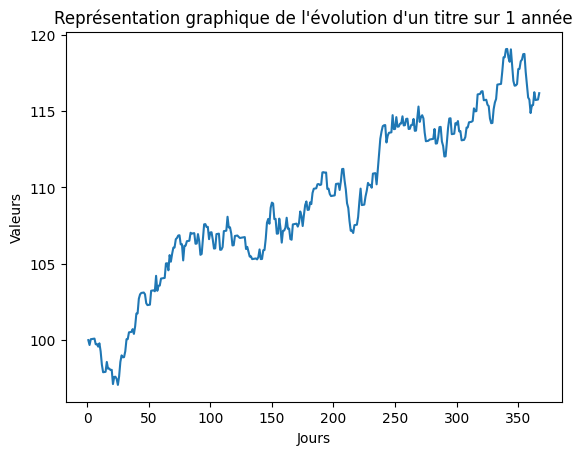

In [18]:
annees, n_annees, n_mois, jours_ans, n_jours = logiqueAnnee(start_annee, fin_annee)
compteur = 0
valeurs.append(valeur_depart)

historique = {}
historique[0]= valeur_depart

for i in range(1,n_jours+1):
    if compteur == 0:
        ancienne_valeur = valeur_depart
        valeurs.append(calcul(i, n_jours, f_faillite, f_reussite, taux, valeur_depart, ancienne_valeur, probaNormale, n_annees, historique))
        historique[i]= valeurs[i]
    else:
        ancienne_valeur = valeurs[i-1]
        valeurs.append(calcul(i, n_jours, f_faillite, f_reussite, taux, valeur_depart, ancienne_valeur, probaNormale, n_annees, historique))
        historique[i]= valeurs[i]
    compteur += 1

#print(historique)
#print("#####")
#print(valeurs)
#en gros x représente les jours alors que y représente les valeurs boursières
x = range(1,n_jours+1+1) #+1 car on prend 0 au départ comme valeur de depart
y = valeurs

plt.plot(x, y)
plt.title("Représentation graphique de l'évolution d'un titre sur 1 année")
plt.xlabel("Jours")
plt.ylabel("Valeurs")

plt.show()